#**Decision Tree MODEL**

**Step 1 | Data Pre-Processing**

**Importing the Libraries**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
#from sklearn import datasets, neighbors
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import cross_val_score # import all the functions reqd for cross validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

**Importing the dataset**

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
#unique values in each column
df_unique = df.nunique().to_frame().reset_index()
df_unique.columns = ['Variable','DistinctCount']
df_unique

,Variable,DistinctCount
0,User ID,400
1,Gender,2
2,Age,43
3,EstimatedSalary,117
4,Purchased,2


Dropping the `User ID` column.

In [8]:
df=df.drop(['User ID'], axis=1)

In [9]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


Convert gender colum to int format.

Male is 0

Female is 1


In [10]:
df['Gender'] = df['Gender'].map({'Male':0 ,'Female':1})
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


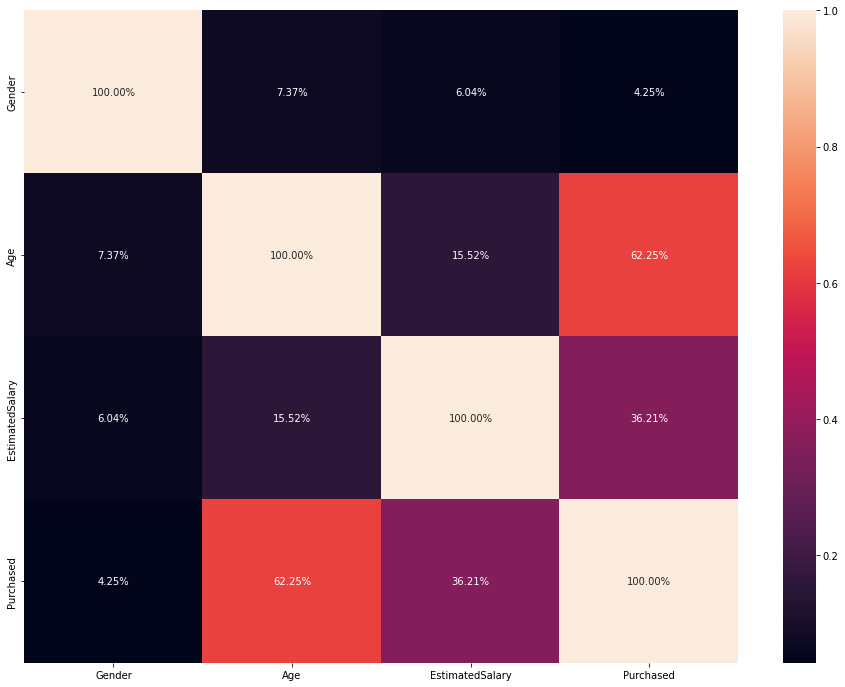

In [11]:
plt.figure(figsize = (16, 12))
sns.heatmap(df.corr(), annot = True, fmt = '.2%')

**EDA**

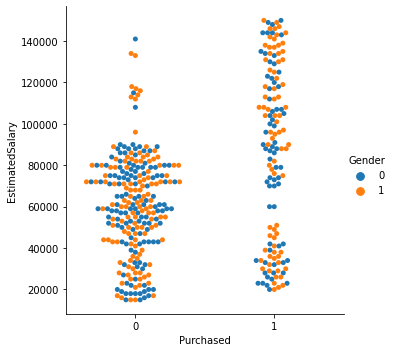

In [12]:

sns.catplot(x="Purchased", y="EstimatedSalary", hue="Gender", kind="swarm", data=df)

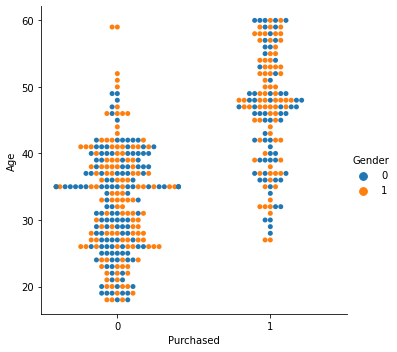

In [13]:
sns.catplot(x="Purchased", y="Age", hue="Gender", kind="swarm", data=df)

From the diagram we can tell that `Purchased` is highly correlated with `Age`. The `Estimatedsalary` has also a good correlation.

Creatting dummy variables for encoding

In [14]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [15]:
df = pd.get_dummies(df, columns = ['Gender'])

In [16]:
b = []
for i in df.keys():
  b.append(i)
print(b)

['Age', 'EstimatedSalary', 'Purchased', 'Gender_0', 'Gender_1']


In [17]:
df

,Age,EstimatedSalary,Purchased,Gender_0,Gender_1
0,19,19000,0,1,0
1,35,20000,0,1,0
2,26,43000,0,0,1
3,27,57000,0,0,1
4,19,76000,0,1,0
...,...,...,...,...,...
395,46,41000,1,0,1
396,51,23000,1,1,0
397,50,20000,1,0,1
398,36,33000,0,1,0


**Fitting decision tree to the Training set**

**Splitting the dataset into the Training set and Test set**

In [18]:
b.remove('Purchased')

In [19]:
b

['Age', 'EstimatedSalary', 'Gender_0', 'Gender_1']

In [20]:
X = df[b]#array of features
y = df['Purchased']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Feature Scaling(not mandatory)**

In [22]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train,y_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data 

**Fitting the Decision tree model**

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred
#print(y_pred[0:5])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1])

# Reducing Overfitting

In [24]:
##there are 1 param to play with - max depth - to choose the best parameter, I will try different combinations and hoose the one which has the best accuracy/auc/any eval metric on cross-validation or test data-set
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score #this will help me to do cross- validation
import numpy as np

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) # will tell the DT to not grow past the given threhsold
  # Fit dt to the training set
  dt.fit(X_train_scaled, y_train) # the model is trained
  trainAccuracy = accuracy_score(y_train, dt.predict(X_train_scaled)) # this is useless information - i am showing to prove a point
  dt = DecisionTreeClassifier(max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = cross_val_score(dt, X, y, cv=10) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,np.mean(valAccuracy))




Depth  :  1  Training Accuracy :  0.815625  Cross val score :  0.825
Depth  :  2  Training Accuracy :  0.909375  Cross val score :  0.8949999999999999
Depth  :  3  Training Accuracy :  0.9125  Cross val score :  0.85
Depth  :  4  Training Accuracy :  0.925  Cross val score :  0.8724999999999999
Depth  :  5  Training Accuracy :  0.9375  Cross val score :  0.8675
Depth  :  6  Training Accuracy :  0.95  Cross val score :  0.8649999999999999
Depth  :  7  Training Accuracy :  0.9625  Cross val score :  0.86
Depth  :  8  Training Accuracy :  0.975  Cross val score :  0.8474999999999999
Depth  :  9  Training Accuracy :  0.98125  Cross val score :  0.8474999999999999
Depth  :  10  Training Accuracy :  0.9875  Cross val score :  0.85
Depth  :  20  Training Accuracy :  1.0  Cross val score :  0.835


# Evaluating a decision tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth 
dt = DecisionTreeClassifier(max_depth=2)

# Fit dt to the training set
dt.fit(X_train_scaled, y_train) # it will ask all possible questions, compute the information gain and choose the best split

# Predict test set labels
y_pred = dt.predict(X_test_scaled)
y_pred
#print(y_pred[0:5])

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

Test set accuracy: 0.95
Test set auc: 0.95
Train set AUC :  0.9141783296648531


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


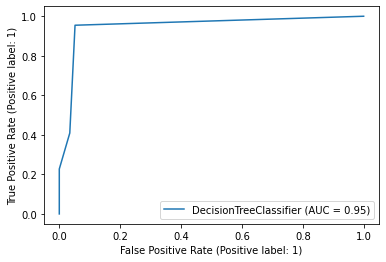

In [26]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
#we compute the eval metric on test/validation set only primarily

# Predict test set labels
y_pred = dt.predict(X_test_scaled) 

# Compute test set accuracy
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))
acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test_scaled, y_test)


acc = roc_auc_score(y_train, dt.predict(X_train_scaled))
print("Train set AUC : ", acc)


In [27]:
from sklearn.metrics import plot_roc_curve, roc_curve, roc_auc_score, confusion_matrix, f1_score
#logistic_regression.score(X_test,y_test) # accuracy
#confusion_matrix(y_test,y_pred)
f1_score(y_test,y_pred)
#logistic_regression.score(X_test,y_test)
# rf.roc_auc_score(y_test, y_pred)

0.9130434782608695

In [28]:
confusion_matrix(y_test,y_pred)

array([[55,  3],
       [ 1, 21]])

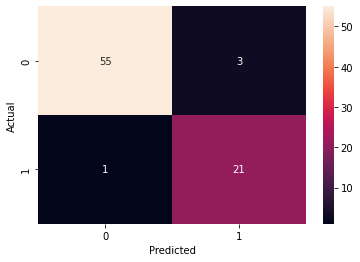

In [29]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

# Feature Importances

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from matplotlib import pyplot
dt = DecisionTreeClassifier(max_depth = 2)
# Fit dt to the training set
dt.fit(X_train, y_train)
importance = dt.feature_importances_
#pyplot.bar([x for x in range(len(importance))], importance)
list(zip(importance,X_test.columns)) # it calculates the feature importances based on IG

[(0.5829633378998026, 'Age'),
 (0.41703666210019735, 'EstimatedSalary'),
 (0.0, 'Gender_0'),
 (0.0, 'Gender_1')]

In [32]:
X.columns

Index(['Age', 'EstimatedSalary', 'Gender_0', 'Gender_1'], dtype='object')

# Visualising the tree

[Text(0.5, 0.8333333333333334, 'X[0] <= 42.5\ngini = 0.459\nsamples = 320\nvalue = [206, 114]'),
 Text(0.25, 0.5, 'X[1] <= 90500.0\ngini = 0.282\nsamples = 230\nvalue = [191, 39]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.079\nsamples = 193\nvalue = [185, 8]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [6, 31]'),
 Text(0.75, 0.5, 'X[1] <= 38500.0\ngini = 0.278\nsamples = 90\nvalue = [15, 75]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.069\nsamples = 28\nvalue = [1, 27]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.35\nsamples = 62\nvalue = [14, 48]')]

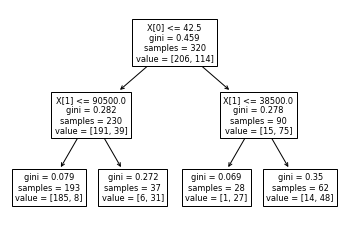

In [33]:
from sklearn import tree
tree.plot_tree(dt) # dt is the decison tree that I have learnt

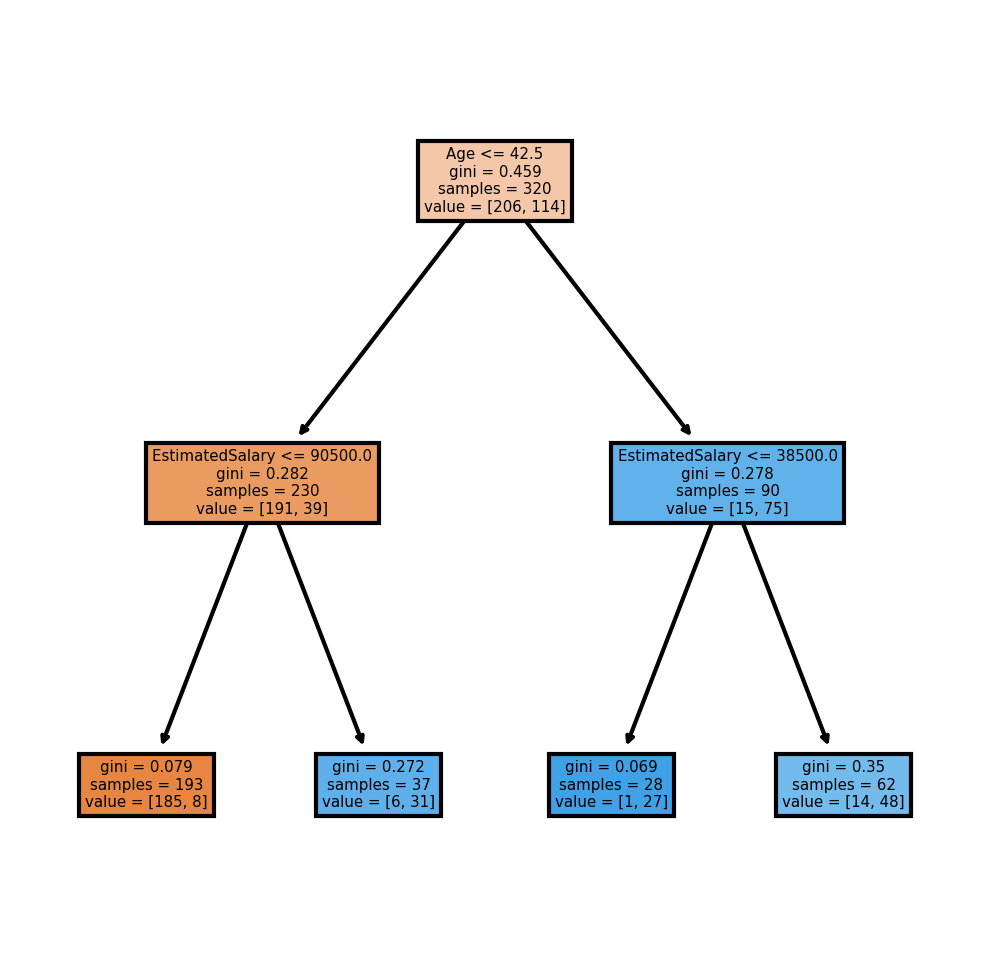

In [37]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt,
               feature_names = X_test.columns,
               filled = True);
fig.savefig('imagename.png')